# GP Regression Demo
This demonstration covers the basics of a supervised learning problem with gptorch:
* Defining a model
* Training the model
* Predicting with the model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

np.random.seed(42)
torch.manual_seed(42)

In [2]:
from gptorch.models.gpr import GPR
from gptorch.models.sparse_gpr import VFE
from gptorch import kernels
from gptorch.util import TensorType

In [3]:
from gptorch import kernels

## Ground truth and training data
We'll try to model a simple one-dimensional sinusoid.

In [4]:
def f(x):
    return np.sin(2. * np.pi * x) + np.cos(3.5 * np.pi * x) - 3.0 * x + 5.0

In [5]:
n = 100
x = np.linspace(0, 1, n).reshape((-1, 1))
y = f(x) + 0.1 * np.random.randn(n, 1)

## Model definition
Here, we define the GP model.
The API is the same for exact or sparse GPs.

The main components of a GP model are:
* The mean function
* The kernel
* The likelihood

In [6]:
# Kernel

# kern = kernels.Rbf(1)
# kern = kernels.Matern32(1)
kern = kernels.Linear(1) + kernels.Rbf(1)

### Mean functions
Thanks to PyTorch, we can use anything that we'd like as a mean function that's a `torch.nn.Module`--anything from a linear mean function to a full-blown neural network!

In [7]:
# Simple linear mean function:
# mean_function = torch.nn.Linear(1, 1)

# Something more exotic
mean_function = torch.nn.Sequential(
    torch.nn.Linear(1, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 1)
)

In [8]:
# (Likelihood defaults to Gaussian)

In [9]:
# Try different models:
model = GPR(y, x, kern, mean_function=mean_function)
# model = VFE(y, x, kern)

## Train the model

In [10]:
# Train
model.optimize(method="L-BFGS-B", max_iter=500)
print("Trained model:")
print(model)

Scipy.optimize.minimize...
loss: [129.79786786]
loss: [100.1141351]
loss: [96.38948157]
loss: [82.50050575]
loss: [229.14706472]
loss: [34.0003542]
loss: [14.880033]
loss: [-1.38095558]
loss: [-34.20742532]
loss: [-53.89738735]
loss: [-12.2072722]
loss: [-60.57832024]
loss: [-65.49435073]
loss: [-67.49002669]
loss: [-68.03112965]
loss: [-68.10544077]
loss: [-68.20536496]
loss: [-68.31875083]
loss: [-68.77732391]
loss: [-69.00658544]
loss: [-69.13362219]
loss: [-69.18443296]
loss: [-69.31782898]
loss: [-69.26183127]
loss: [-69.29679412]
loss: [-69.32083016]
loss: [-69.35429834]
loss: [-69.39154462]
loss: [-69.44145965]
loss: [-69.51935123]
loss: [-69.61457597]
loss: [-69.6694079]
loss: [-69.99726388]
loss: [-70.32465152]
loss: [-70.46565878]
loss: [-70.78878366]
loss: [-70.82073251]
loss: [-70.95726535]
loss: [-70.78432249]
loss: [-71.07715936]
loss: [-71.16363345]
loss: [-71.22303392]
loss: [-71.165815]
loss: [-71.26803493]
loss: [-71.399243]
loss: [-71.51376923]
loss: [-71.62193351]
l

loss: [-76.80693816]
loss: [-76.81451473]
loss: [-76.8277197]
loss: [-76.83292066]
loss: [-76.84265298]
loss: [-76.84675327]
loss: [-76.85721725]
loss: [-76.86084426]
loss: [-76.88060217]
loss: [-76.89459278]
loss: [-76.89345207]
loss: [-76.89728682]
loss: [-76.90160888]
loss: [-76.91021311]
loss: [-76.89595645]
loss: [-76.91174364]
loss: [-76.91604378]
loss: [-76.91167549]
loss: [-76.91857265]
loss: [-76.92239106]
loss: [-76.92926868]
loss: [-76.93526687]
loss: [-76.94170945]
loss: [-76.95021856]
loss: [-76.96486086]
loss: [-76.98080072]
loss: [-76.99906003]
loss: [-77.0137065]
loss: [-77.02690799]
loss: [-77.04074247]
loss: [-77.04105657]
loss: [-77.0522941]
loss: [-77.07454963]
loss: [-77.10238647]
loss: [-77.10541297]
loss: [-77.14424514]
loss: [-77.15988836]
loss: [-77.18324941]
loss: [-77.221935]
loss: [-77.25572606]
loss: [-77.27269585]
loss: [-77.2866239]
loss: [-77.30446053]
loss: [-77.33084843]
loss: [-77.27779477]
loss: [-77.34299999]
loss: [-77.35820244]
loss: [-77.34293889

## Predict

In [11]:
# Predict
n_test = 200
n_samples = 5
x_test = np.linspace(-1, 2, n_test).reshape((-1, 1))
mu, s = model.predict_y(x_test)
mu, s = mu.data.numpy().flatten(), s.data.numpy().flatten()
y_samp = model.predict_y_samples(x_test, n_samples=n_samples).data.numpy()
unc = 2.0 * np.sqrt(s)

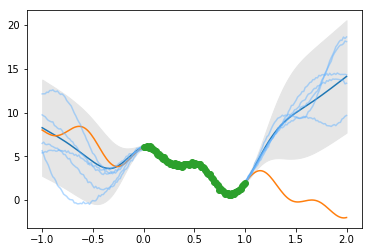

In [12]:
# Show prediction
x_test = x_test.flatten()
plt.figure()
plt.fill_between(x_test, mu - unc, mu + unc, color=(0.9,) * 3)
plt.plot(x_test, mu)
plt.plot(x_test, f(x_test))
for y_samp_i in y_samp:
    plt.plot(x_test, y_samp_i, color=(0.4, 0.7, 1.0), alpha=0.5)
plt.plot(x, y, 'o')
plt.show()